In [12]:
########################## 这个是最终的结果，之前的相关性写错了 ##############
#关于文档的一个数据分类
import pandas as pd
import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster import hierarchy  #用于进行层次聚类，话层次聚类图的工具包
from scipy import cluster   
import matplotlib.pyplot as plt
from sklearn import decomposition as skldec #用于主成分分析降维的包
import numpy as np
#import csv
import math
from pandas import Series,DataFrame
from matplotlib.ticker import  MultipleLocator
import pylab as pl   #画图用
from sklearn import svm
from sklearn import linear_model

In [13]:
pop=['2000Pop','2001Pop','2002Pop','2003Pop','2004Pop','2005Pop','2006Pop','2007Pop','2008Pop','2009Pop',
     '2010Pop','2011Pop','2012Pop','2013Pop','2014Pop','2015Pop','2016Pop','2017Pop']
gdp=['2000GDP','2001GDP','2002GDP','2003GDP','2004GDP','2005GDP','2006GDP','2007GDP','2008GDP','2009GDP',
     '2010GDP','2011GDP','2012GDP','2013GDP','2014GDP','2015GDP','2016GDP','2017GDP']
area=['2000Area','2001Area','2002Area','2003Area','2004Area','2005Area','2006Area','2007Area','2008Area','2009Area',
     '2010Area','2011Area','2012Area','2013Area','2014Area','2015Area','2016Area','2017Area']
roadleng=['2000Roadleng','2001Roadleng','2002Roadleng','2003Roadleng','2004Roadleng','2005Roadleng','2006Roadleng','2007Roadleng','2008Roadleng','2009Roadleng',
     '2010Roadleng','2011Roadleng','2012Roadleng','2013Roadleng','2014Roadleng','2015Roadleng','2016Roadleng','2017Roadleng']
inv_times=['2000invtime','2001invtime','2002invtime','2003invtime','2004invtime','2005invtime','2006invtime','2007invtime','2008invtime','2009invtime',
     '2010invtime','2011invtime','2012invtime','2013invtime','2014invtime','2015invtime','2016invtime','2017invtime']
investment=['2000inv','2001inv','2002inv','2003inv','2004inv','2005inv','2006inv','2007inv','2008inv','2009inv',
     '2010inv','2011inv','2012inv','2013inv','2014inv','2015inv','2016inv','2017inv']

In [14]:
data2 =pd.read_excel('E:/文档系列/python 系列/TheData/0_theDATA_end(1991-2017pop&GDP&vc)/ALL_Intersection.xlsx')  # 读取训练数据
city=data2['City'].drop_duplicates().values
City=data2['city'].drop_duplicates().values

In [15]:
### 获得双对数的值 ，舍掉双对数中的0值###
def get_log(inv,g,DATA):
    ### + 1e-5解决RuntimeWarning: divide by zero encountered in log10 This is separate from the ipykernel package so we can avoid doing imports until
#     y_investment=np.log10(DATA[inv]+ 1e-5)
#     y_gdp=np.log10(DATA[g]+ 1e-5)
    y_investment=np.log(DATA[inv])
    y_gdp=np.log(DATA[g])
    y_investment2=y_investment.fillna(np.infty)
    y_gdp2=y_gdp.fillna(np.infty)
    x1=[]
    y1=[]
    for xi,yi in zip(y_investment2,y_gdp2):
        if xi==-float('Inf') or xi==float('Inf') or yi==-float('Inf') or yi==float('Inf'):
            continue
        else:
            x1.append(xi)
            y1.append(yi)
    return(x1,y1)

In [16]:
### 6.最小二乘拟合
from scipy.optimize import leastsq  ##引入最小二乘法算法
from sklearn.metrics import r2_score
#需要拟合的函数func :指定函数的形状
def func(p,x):
    k,b=p
    return k*x+b

##偏差函数：x,y都是列表:这里的x,y更上面的Xi,Yi中是一一对应的
def error(p,x,y):
    return func(p,x)-y
def pic6(yt):
    yt1=yt[0]
    yt2=yt[1]
    #k,b的初始值，可以任意设定,经过几次试验，发现p0的值会影响cost的值：Para[1]
    p0=[1,10]
    Xi=np.array(yt1)
    Yi=np.array(yt2)
    #把error函数中除了p0以外的参数打包到args中(使用要求)
    Para=leastsq(error,p0,args=(Xi,Yi))## 三个参数：误差函数、函数参数列表、数据点

    #读取结果
    k,b=Para[0]
    y = [k*xx + b for xx in yt1]
    r=r2_score(yt2,y)
    r2=round(r, 2) 
    return(k,r2)

In [17]:
def getR(data,cname1,cname2,c1,c2,ss):###得到标度率
    r=[]
    for i in range(18):
        X11=c1[i]
        X21=c2[i]
        y1=get_log(X11,X21,data)
        #plt.subplot(221)
        np.shape(y1),np.shape(X11)
        rc=pic6(y1)[0]###得到每一年的标度率
        r.append(rc)
    x=np.arange(2000,2018,1)
    yearsL = list(map(str,list(range(2000,2018))))
    xmajorLocator = MultipleLocator(2)
    xminorLocator = MultipleLocator(1.0)###设置刻度
    x_major_locator=MultipleLocator(2)
    #把x轴的刻度间隔设置为1，并存在变量里
    ax=plt.gca()
    #ax为两条坐标轴的实例
    ax.xaxis.set_major_locator(x_major_locator)
    #把x轴的主刻度设置为1的倍数
    font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 22,
    }###设置横纵坐标的字体格式
    font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 14,
    }###设置横纵坐标的字体格式
    plt.xlabel('year',font2)
    plt.ylabel('β',font2)
#     plt.ylabel(r'$\beta{}$',font2)
#     plt.xaxis.set_major_locator(xmajorLocator)
#     plt.xaxis.set_minor_locator(xminorLocator)
#     plt.xaxis
    yy=[1 for hh in range(len(yearsL))]
    plt.tick_params(labelsize=16) #刻度字体大小13
#     plt.xlim(2000,2017)
    plt.plot(yearsL,yy,color='black', linestyle='--',linewidth=2,alpha=0.5)
    plt.plot(yearsL,r,marker=ss,markersize=8,label=cname2)###不同情况下标记为不同的图形
    
    plt.legend(prop=font1)
    #return(r)

In [18]:
def getR2(data,cname1,cname2,c1,c2):###得到r……2
    r=[]
    for i in range(18):
        X11=c1[i]
        X21=c2[i]
        y1=get_log(X11,X21,data)
        #plt.subplot(221)
        np.shape(y1),np.shape(X11)
        rc=pic6(y1)[1]###得到每一年的标度率
        r.append(rc)
    x=np.arange(2000,2018,1)
    yearsL = list(map(str,list(range(2000,2018))))
    xmajorLocator = MultipleLocator(2)
    xminorLocator = MultipleLocator(1.0)###设置刻度
    x_major_locator=MultipleLocator(2)
    #把x轴的刻度间隔设置为1，并存在变量里
    ax=plt.gca()
    #ax为两条坐标轴的实例
    ax.xaxis.set_major_locator(x_major_locator)
    #把x轴的主刻度设置为1的倍数
    font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 22,
    }###设置横纵坐标的字体格式
    font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 14,
#     slant=tkFont.ITALIC
    }###设置横纵坐标的字体格式
    plt.xlabel('year',font2)
    plt.ylabel('R'+r'$ ^2$',font2)
#     plt.xaxis.set_major_locator(xmajorLocator)
#     plt.xaxis.set_minor_locator(xminorLocator)
#     plt.xaxis
    yy=[0.6 for hh in range(len(yearsL))]
    plt.tick_params(labelsize=16) #刻度字体大小13
#     plt.xlim(2000,2017)
#     plt.plot(yearsL,yy,color='black', linestyle='--',linewidth=3)
    plt.plot(yearsL,r,marker='o',label=cname2)
    
    plt.legend(prop=font1)
    #return(r)

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encounte

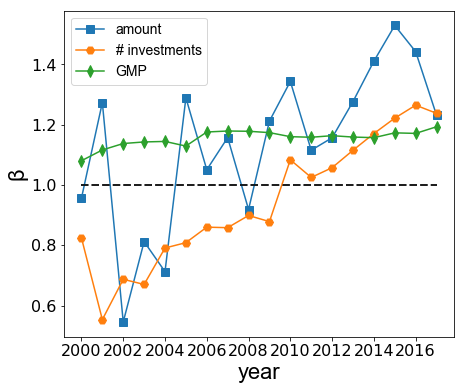

In [9]:
###将三种因素下的标度率变化图放在一张图上
plt.figure(figsize=(7,6))
getR(data2,'p','amount',pop,investment,'s')
getR(data2,'p','# investments',pop,inv_times,'H')
getR(data2,'p','GMP',pop,gdp,'d')
# plt.tight_layout()
plt.savefig('E:/文档系列/python 系列/picScalling/20201025NEW/Fig4_a_saclinglaw.pdf', bbox_inches='tight')

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encounte

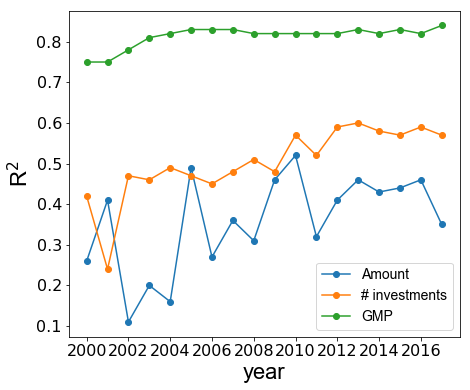

In [19]:
###将三种因素下的标度率变化图放在一张图上
from sklearn.metrics import r2_score
plt.figure(figsize=(7,6))
getR2(data2,'p','Amount',pop,investment)
getR2(data2,'p','# investments',pop,inv_times)
getR2(data2,'p','GMP',pop,gdp)
# plt.tight_layout()
plt.savefig('E:/文档系列/python 系列/picScalling/20201025NEW/Fig4_a2(00-17R^2).pdf', bbox_inches='tight')